In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical_insurance=df.drop_duplicates()

In [8]:
medical_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
medical_insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


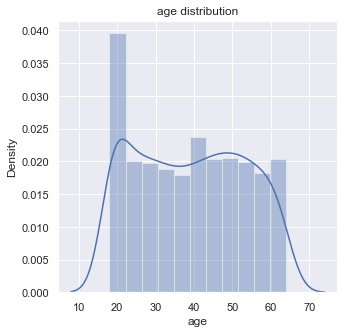

In [10]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medical_insurance['age'])# distplot tells us the distribution of the dataset throghtout
plt.title('age distribution')
plt.show()

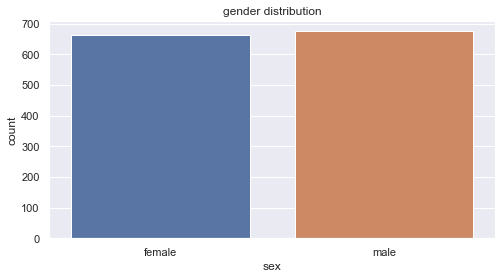

In [11]:
# we cannot use categoreical  on the characters
plt.figure(figsize=(8,4))
sns.countplot(x='sex',data=medical_insurance)
plt.title('gender distribution')
plt.show()

In [12]:
# value count is helped to see how many values are their in the dataset
medical_insurance['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

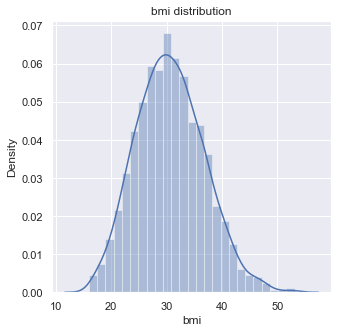

In [13]:
#bmi distribution( body mass index)
plt.figure(figsize=(5,5))
sns.distplot(medical_insurance['bmi'])# distplot tells us the distribution of the dataset throghtout
plt.title('bmi distribution')
plt.show()

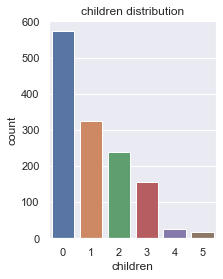

In [14]:
# we can use countplot for children column 
plt.figure(figsize=(3,4))
sns.countplot(x='children',data=medical_insurance)
plt.title('children distribution')
plt.show()

In [15]:
# we checking the  number of childrens with the help of the value counts for the accurate numbers
medical_insurance['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

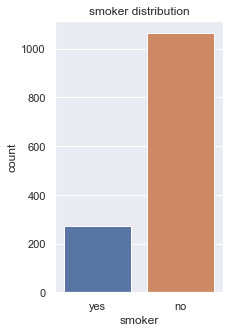

In [16]:
sns.set()
plt.figure(figsize=(3,5))
sns.countplot(medical_insurance['smoker'])
plt.title('smoker distribution')
plt.show()

In [17]:
medical_insurance['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

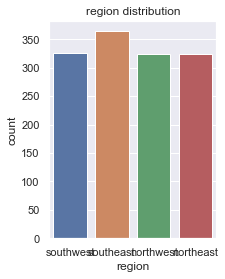

In [18]:
# we can use countplot for children column 
plt.figure(figsize=(3,4))
sns.countplot(x='region',data=medical_insurance)
plt.title('region distribution')
plt.show()

In [19]:
medical_insurance['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [20]:
#Encoding sex column
medical_insurance.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding smoker column
medical_insurance.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#Encoding region column
medical_insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [21]:
medical_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [22]:
x=medical_insurance.drop(columns='charges',axis=1)# we are dropping the charges column and swaving in x
y=medical_insurance['charges']# we are saving the charges column in y

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape, y_test.shape)

(1337, 6) (1069, 6) (268, 6)
(1337,) (1069,) (268,)


In [25]:
reg=LinearRegression()
reg

LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
# model evaluation
train_pred=reg.predict(x_train)

In [30]:
# R Squared value ( it lies in the range of 0 to 1 )
r2_train= metrics.r2_score(y_train,train_pred)
print('R  Squared value :',r2_train)

R  Squared value : 0.7584123253312958


In [31]:
test_pred=reg.predict(x_test)
r2_test=metrics.r2_score(y_test,test_pred)
print('R  Squared value :',r2_test)

R  Squared value : 0.7150366419551835


In [32]:
# building the predictive system
input_data=(31,1,25.74,0,1,0)
# changing the input data into the numpy array
num_array=np.asarray(input_data)

#reshaping the array
reshaped_num_array=num_array.reshape(1,-1)

prediction=reg.predict(reshaped_num_array)
print(prediction)
print('The insurance cost is USD ',prediction[0])

[3927.55421975]
The insurance cost is USD  3927.5542197480117
